# Code Summary: Handwritten Digit Classification with SVM

## 1. Loading the Dataset:

* The code begins by loading the MNIST dataset, which contains images of handwritten digits (0-9) and their corresponding labels.

## 2. Data Preprocessing:

* The pixel values of the images are normalized to the range [0, 1] to ensure consistency in feature scaling.

## 3. Splitting the Data:

* The dataset is split into training and test sets, with 80% of the data used for training the model and 20% for testing.

## 4. Training the SVM Model:

* An SVM (Support Vector Machine) classifier with a linear kernel is created using scikit-learn's SVC class.
* The model is trained on the training data using the fit method.

## 5. Model Evaluation:

* The trained model is used to make predictions on the test dataset.
* The accuracy of the model is computed using scikit-learn's accuracy_score function.
* A confusion matrix is generated to evaluate the model's performance in detail.
* The classification report, including metrics like precision, recall, and F1-score, is printed.

## 6. Testing with New Digits:

* An example of a new digit (e.g., handwritten) is selected from the test dataset.
* The trained SVM model is used to predict the digit based on the new input.

## 7. Visualization of Results:

* Matplotlib is used to create visualizations of the results.
* The first subplot displays the new digit and the digit predicted by the model.
* The second subplot shows the confusion matrix, which provides insights into the model's performance.

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt



In [2]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

X /= 16.0  # Normalize pixel values to the range [0, 1]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




In [3]:
svm_classifier = SVC(kernel='linear', C=1.0)  # Linear kernel is used here, but you can try other kernels
svm_classifier.fit(X_train, y_train)



SVC(kernel='linear')

In [4]:
y_pred = svm_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print("Model Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion)
print("Classification Report:\n", classification_report(y_test, y_pred))

new_digit = X_test[0]  # You can replace this with a new digit drawn by the user
predicted_digit = svm_classifier.predict([new_digit])
print("Predicted Digit:", predicted_digit[0])




Model Accuracy: 0.9861111111111112
Confusion Matrix:
 [[33  0  0  0  0  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 33  0  1  0  0  0  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 47  0  0  0  0]
 [ 0  0  0  0  0  0 35  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  1  0  0 28  0]
 [ 0  0  0  0  0  0  0  0  1 39]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      0.97      0.99        34
           4       1.00      1.00      1.00        46
           5       0.96      1.00      0.98        47
           6       1.00      1.00      1.00        35
           7       1.00      0.97      0.99        34
           8       0.97      0.93      0.95        30
           9       0.97      0.97      0.97       

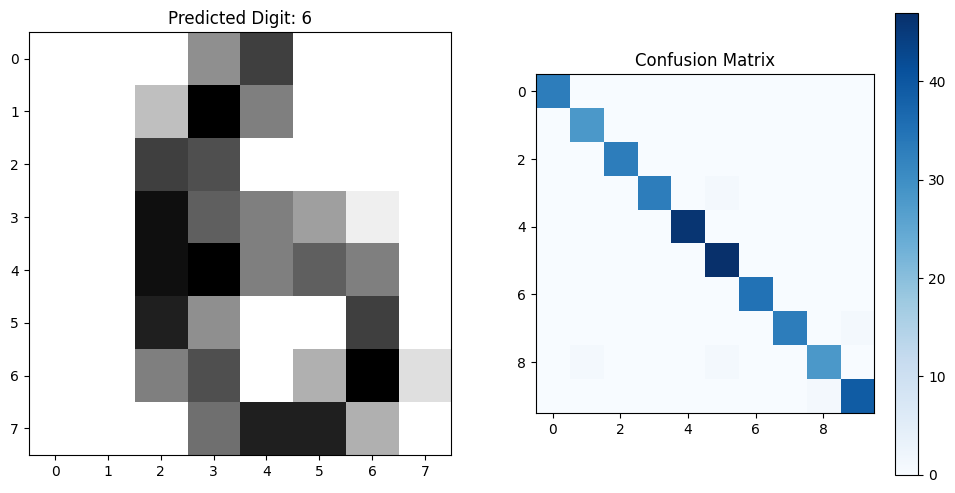

In [5]:
plt.figure(figsize=(12, 6))

# Plot the drawn digit
plt.subplot(1, 2, 1)
plt.imshow(new_digit.reshape(8, 8), cmap=plt.cm.gray_r, interpolation='nearest')
plt.title(f'Predicted Digit: {predicted_digit[0]}')

# Plot the confusion matrix
plt.subplot(1, 2, 2)
plt.imshow(confusion, interpolation='nearest', cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.colorbar()

plt.show()